# 01. Importing libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# 02. Importing dataframe

In [2]:
# Creating path first
path = r'/Users/jaksdt/Desktop/Data analytics stuff/Data immersion/Exercises 1 - 10/Section 6'

In [3]:
# Importing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'citibike3.csv'), index_col = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  49977 non-null  int64  
 1   weekday                  49977 non-null  object 
 2   start_hour               49977 non-null  int64  
 3   start_time               49977 non-null  object 
 4   start_station_id         49977 non-null  int64  
 5   start_station_name       49977 non-null  object 
 6   start_station_latitude   49977 non-null  float64
 7   start_station_longitude  49977 non-null  float64
 8   end_time                 49977 non-null  object 
 9   end_station_id           49977 non-null  int64  
 10  end_station_name         49977 non-null  object 
 11  end_station_latitude     49977 non-null  float64
 12  end_station_longitude    49977 non-null  float64
 13  trip_duration            49977 non-null  int64  
 14  subscriber            

In [5]:
# Changing start_time column from string to datetime
df['start_time'] = df['start_time'].astype('datetime64[ns]')

In [6]:
# Changing end_time column from string to datetime
df['end_time'] = df['end_time'].astype('datetime64[ns]')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bike_id                  49977 non-null  int64         
 1   weekday                  49977 non-null  object        
 2   start_hour               49977 non-null  int64         
 3   start_time               49977 non-null  datetime64[ns]
 4   start_station_id         49977 non-null  int64         
 5   start_station_name       49977 non-null  object        
 6   start_station_latitude   49977 non-null  float64       
 7   start_station_longitude  49977 non-null  float64       
 8   end_time                 49977 non-null  datetime64[ns]
 9   end_station_id           49977 non-null  int64         
 10  end_station_name         49977 non-null  object        
 11  end_station_latitude     49977 non-null  float64       
 12  end_station_longitude    49977 n

In [8]:
# Configuring API key 

quandl.ApiConfig.api_key = 'yourAPIkey'

## Cleaning and wrangling had been done in previous exercises

In [9]:
# Creating list of amount of trips each day
day_counts = df.groupby( df['start_time'].dt.date)['start_time'].count()

In [10]:
day_counts

start_time
2013-09-01    1190
2013-09-02    1041
2013-09-03    1538
2013-09-04    1769
2013-09-05    1621
2013-09-06    1721
2013-09-07    1607
2013-09-08    1575
2013-09-09    1665
2013-09-10    1808
2013-09-11    1770
2013-09-12    1525
2013-09-13    1836
2013-09-14    1567
2013-09-15    1610
2013-09-16    1473
2013-09-17    1838
2013-09-18    1841
2013-09-19    1810
2013-09-20    1999
2013-09-21    1599
2013-09-22    1429
2013-09-23    1719
2013-09-24    1878
2013-09-25    1844
2013-09-26    1893
2013-09-27    1752
2013-09-28    1734
2013-09-29    1511
2013-09-30    1814
Name: start_time, dtype: int64

## I chose to count all the rides each day, because I figured that it must be the most important to check. This should give an indication how many rides there could be in the following month.

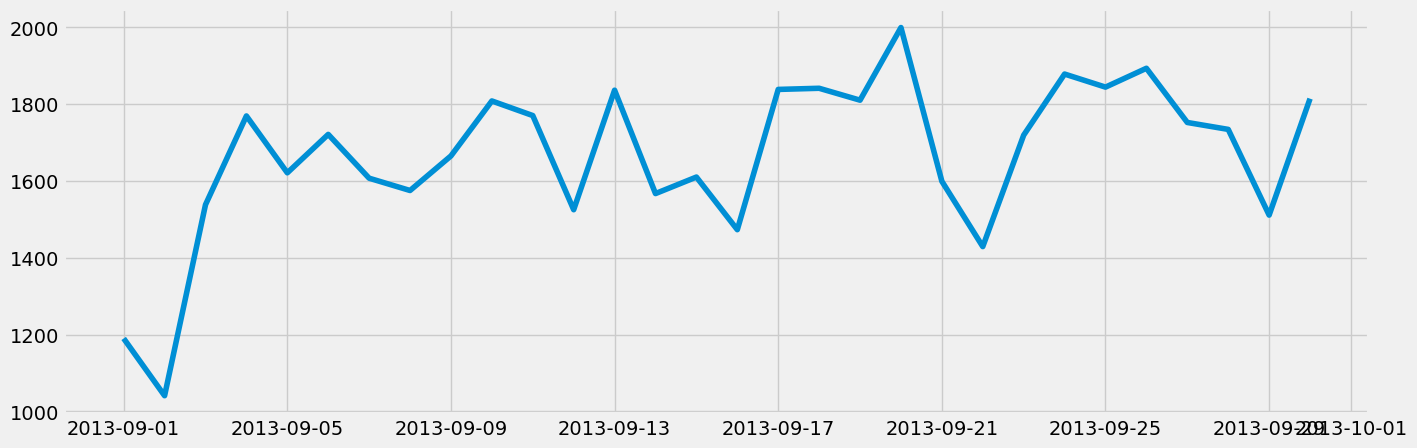

In [11]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

In [12]:
# Checking for missing values
day_counts.isnull().sum() 

0

In [13]:
# Creating list of average trip duration each day
avg_trip_dur_each_day = df.groupby( df['start_time'].dt.date)['trip_duration'].mean()

In [14]:
avg_trip_dur_each_day

start_time
2013-09-01    1007.178992
2013-09-02     905.522574
2013-09-03     806.680104
2013-09-04     849.778971
2013-09-05     831.691548
2013-09-06     823.525857
2013-09-07     948.012446
2013-09-08     938.584127
2013-09-09     836.801201
2013-09-10     793.820243
2013-09-11     767.462147
2013-09-12     772.995410
2013-09-13     785.875817
2013-09-14     913.092534
2013-09-15     921.445342
2013-09-16     783.902919
2013-09-17     788.960283
2013-09-18     786.564367
2013-09-19     782.035359
2013-09-20     810.741371
2013-09-21     917.883677
2013-09-22     914.491253
2013-09-23     805.823153
2013-09-24     777.173589
2013-09-25     817.700108
2013-09-26     765.229266
2013-09-27     813.859018
2013-09-28     943.891003
2013-09-29     914.151555
2013-09-30     794.257993
Name: trip_duration, dtype: float64

In [15]:
# Creating sub set

sub = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_trip_dur_each_day.values})

In [16]:
sub

,date,ride_count,avg_duration
0,2013-09-01,1190,1007.178992
1,2013-09-02,1041,905.522574
2,2013-09-03,1538,806.680104
3,2013-09-04,1769,849.778971
4,2013-09-05,1621,831.691548
5,2013-09-06,1721,823.525857
6,2013-09-07,1607,948.012446
7,2013-09-08,1575,938.584127
8,2013-09-09,1665,836.801201
9,2013-09-10,1808,793.820243


In [17]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [18]:
# Setting "Date" column as the index

from datetime import datetime

sub['datetime'] = pd.to_datetime(sub['date']) # Create a datetime column from "Date.""
sub = sub.set_index('datetime') # Set the datetime as the index of the dataframe.
sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
sub.head()

,ride_count,avg_duration
datetime,,
2013-09-01,1190,1007.178992
2013-09-02,1041,905.522574
2013-09-03,1538,806.680104
2013-09-04,1769,849.778971
2013-09-05,1621,831.691548


In [19]:
# Resetting index so that you can use the "Date" column as a filter

sub2 = sub.reset_index()

In [20]:
sub2

,datetime,ride_count,avg_duration
0,2013-09-01,1190,1007.178992
1,2013-09-02,1041,905.522574
2,2013-09-03,1538,806.680104
3,2013-09-04,1769,849.778971
4,2013-09-05,1621,831.691548
5,2013-09-06,1721,823.525857
6,2013-09-07,1607,948.012446
7,2013-09-08,1575,938.584127
8,2013-09-09,1665,836.801201
9,2013-09-10,1808,793.820243


In [21]:
sub3 = sub2[['datetime','ride_count']]

In [22]:
sub3

,datetime,ride_count
0,2013-09-01,1190
1,2013-09-02,1041
2,2013-09-03,1538
3,2013-09-04,1769
4,2013-09-05,1621
5,2013-09-06,1721
6,2013-09-07,1607
7,2013-09-08,1575
8,2013-09-09,1665
9,2013-09-10,1808


In [23]:
# Reset index so that you can use the "Date" column as a filter

sub3 = sub.reset_index()

In [24]:
sub3

,datetime,ride_count,avg_duration
0,2013-09-01,1190,1007.178992
1,2013-09-02,1041,905.522574
2,2013-09-03,1538,806.680104
3,2013-09-04,1769,849.778971
4,2013-09-05,1621,831.691548
5,2013-09-06,1721,823.525857
6,2013-09-07,1607,948.012446
7,2013-09-08,1575,938.584127
8,2013-09-09,1665,836.801201
9,2013-09-10,1808,793.820243


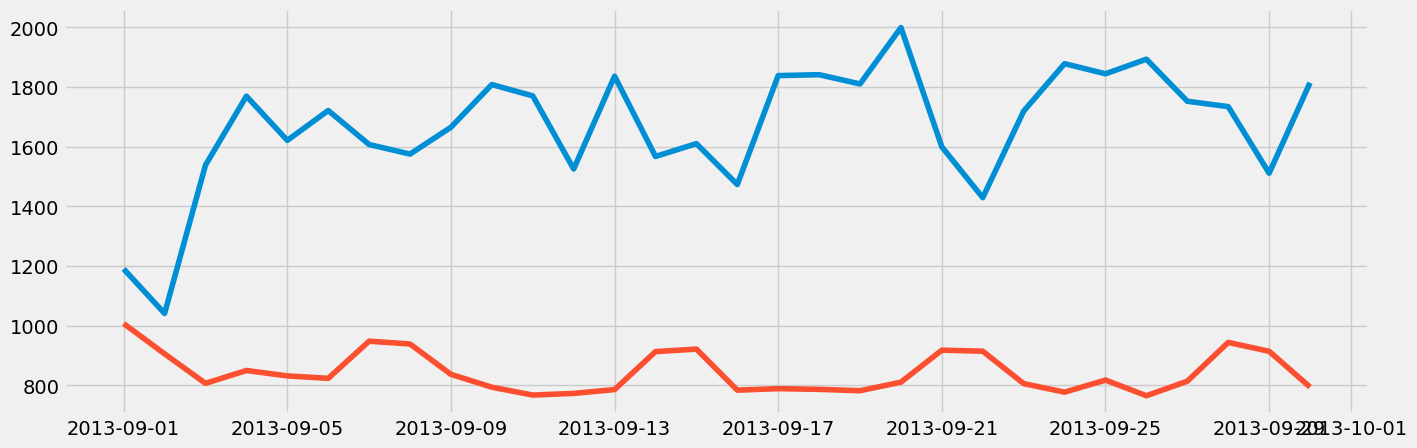

In [31]:
# Plotting new sub set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub)

## Time-series analysis: decomposition

In [33]:
sub

,ride_count,avg_duration
datetime,,
2013-09-01,1190,1007.178992
2013-09-02,1041,905.522574
2013-09-03,1538,806.680104
2013-09-04,1769,849.778971
2013-09-05,1621,831.691548
2013-09-06,1721,823.525857
2013-09-07,1607,948.012446
2013-09-08,1575,938.584127
2013-09-09,1665,836.801201


In [35]:
column_to_drop = 'avg_duration'

In [36]:
sub = sub.drop(column_to_drop, axis=1)

In [37]:
sub

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1721
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


In [38]:
# Reset index so that you can use the "Date" column as a filter

sub1 = sub.reset_index()

In [39]:
sub1

,datetime,ride_count
0,2013-09-01,1190
1,2013-09-02,1041
2,2013-09-03,1538
3,2013-09-04,1769
4,2013-09-05,1621
5,2013-09-06,1721
6,2013-09-07,1607
7,2013-09-08,1575
8,2013-09-09,1665
9,2013-09-10,1808


In [41]:
ts = sub1['ride_count']

In [42]:
sub1['datetime'] = pd.to_datetime(sub1['datetime'])

In [43]:
sub1.set_index('datetime', inplace=True)

In [44]:
sub1

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1721
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


In [45]:
sub1.index.freq = 'D'

In [46]:
sub1

,ride_count
datetime,
2013-09-01,1190
2013-09-02,1041
2013-09-03,1538
2013-09-04,1769
2013-09-05,1621
2013-09-06,1721
2013-09-07,1607
2013-09-08,1575
2013-09-09,1665


In [47]:
ts = sub1['ride_count']

In [48]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')

In [49]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [50]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

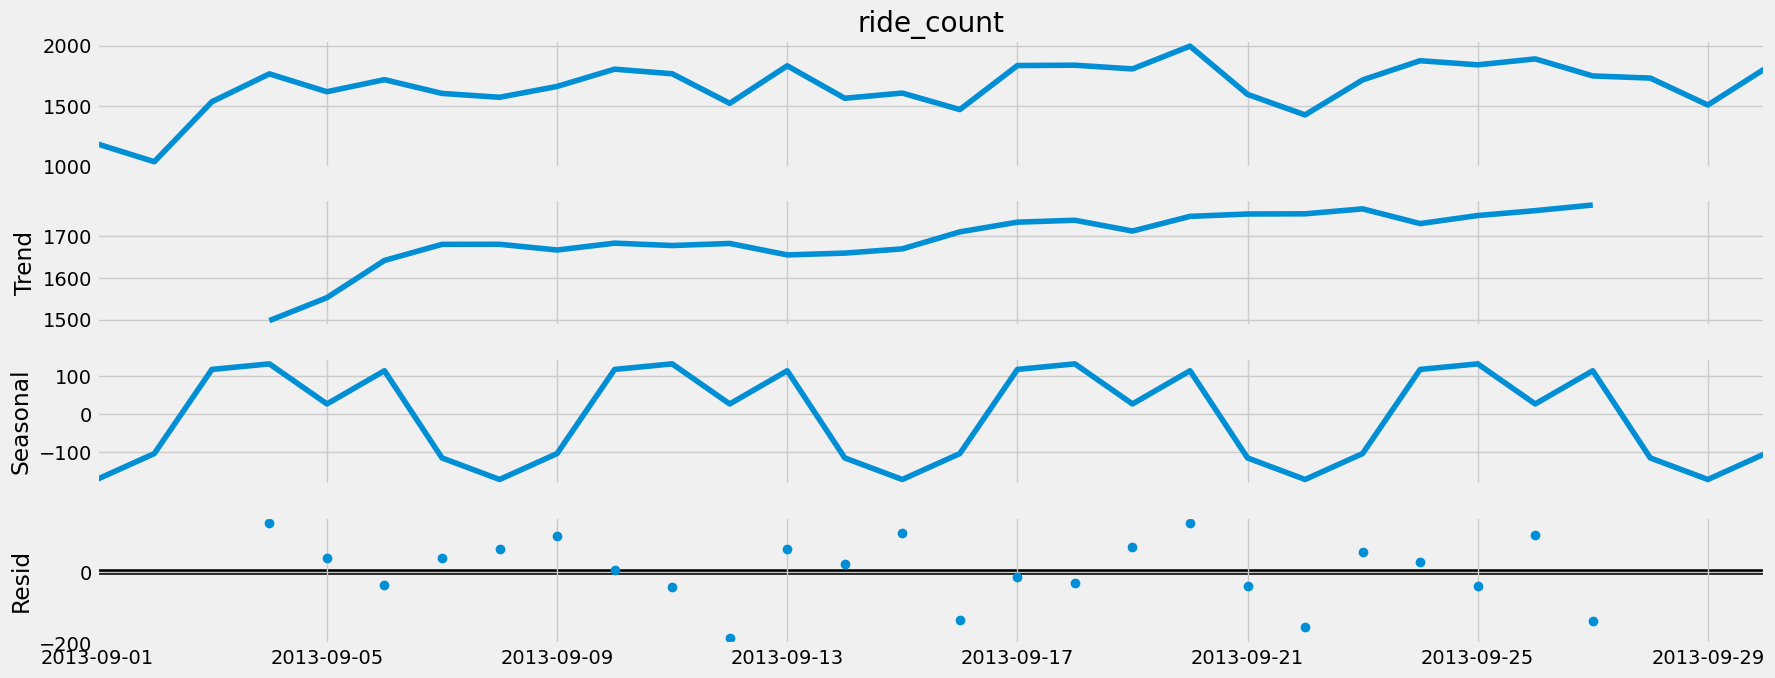

In [51]:
# Plotting separate components

decomposition.plot()
plt.show()

### The level and trend looks different, meaning that I'm working with unsmoothed data.
### The trend graduately goes upward, teeling me that the amout of rides are increasing during the month.
### I can see seasonal fluctuations, but unsure what it means as the data only represents the days of one month. I assume that some days were busier than others as the month went on.
### I can see noise too, but don't know how to explain it. Please advise. 

## Stationarity

In [53]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.870694
p-value                         0.002261
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


### The p-value is less than 0.05%, which is a significant result.
### My critical values for 1%, 5% and 10% are all bigger than my test statistic. This means that there is no unit root and my data is stationary. I can reject my null-hypthesis and continue with my forecast.

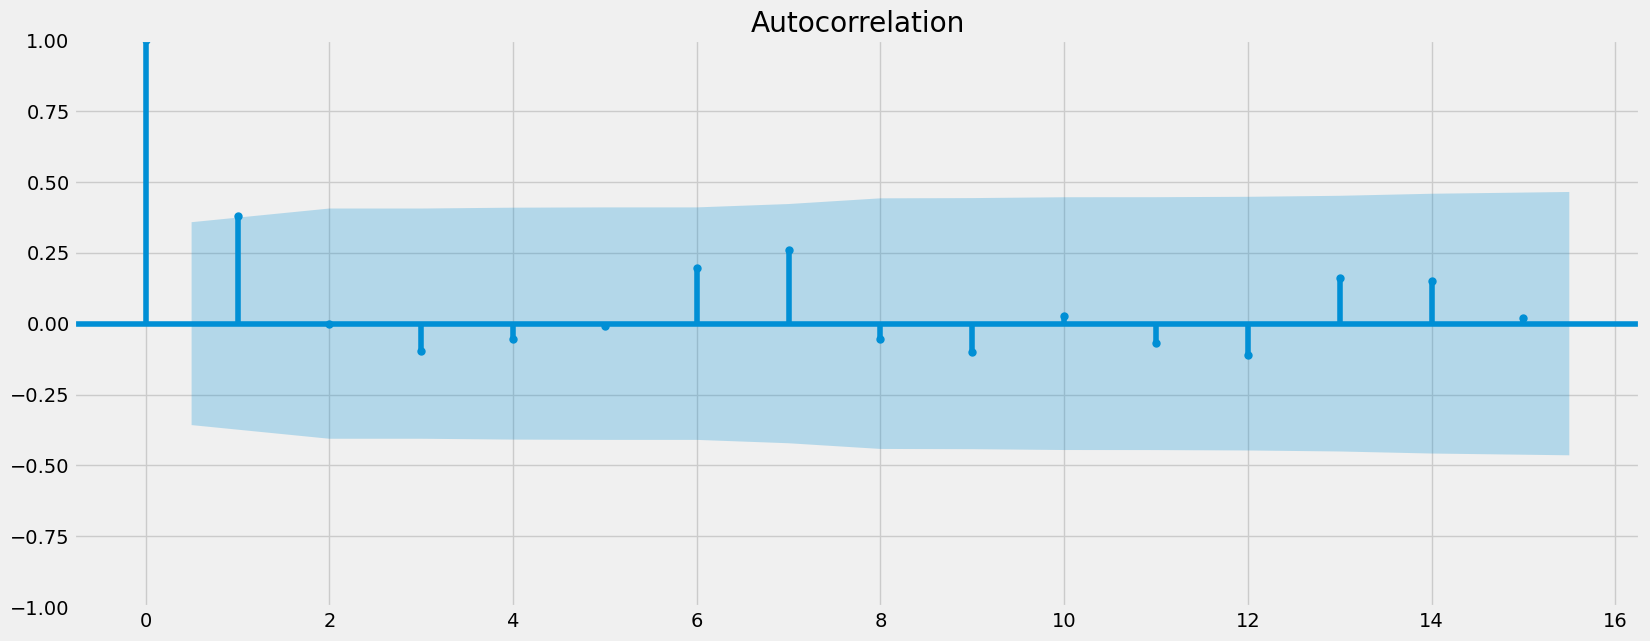

In [55]:
# Checking plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub1)
plt.show()

### I don't need to do any differencing.